In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
m1=[4,4]
m2=[8,8]

cov1=[[1,0],[0,1]]
cov2=[[2,0.5],[0.5,2]]

dist1=np.random.multivariate_normal(m1,cov1,500)
dist2=np.random.multivariate_normal(m2,cov2,500)


In [71]:
dist1

array([[ 3.90912453,  2.88312345],
       [ 3.99494837,  4.97783151],
       [ 3.96940891,  2.90175597],
       [ 4.2093802 ,  3.12707126],
       [ 2.58869734,  2.79030616],
       [ 3.74859039,  3.75866459],
       [ 3.67122396,  1.89180605],
       [ 4.36060371,  2.32384665],
       [ 4.94368953,  4.3765262 ],
       [ 4.23786447,  3.19926835],
       [ 3.461916  ,  2.08555018],
       [ 5.81265282,  4.11402426],
       [ 5.97258878,  4.1406953 ],
       [ 4.78087927,  3.28667178],
       [ 3.4963651 ,  4.60672978],
       [ 2.9785663 ,  2.58771751],
       [ 4.68197103,  4.63031655],
       [ 3.4756543 ,  3.58690231],
       [ 5.01413698,  2.49298197],
       [ 4.50625951,  4.79474448],
       [ 4.79830133,  3.17867777],
       [ 2.99242151,  5.17323624],
       [ 4.17120178,  4.63990066],
       [ 5.0524214 ,  3.71419743],
       [ 3.91708418,  2.47998916],
       [ 5.87333324,  3.85014443],
       [ 5.23643102,  3.31863532],
       [ 4.93119122,  4.11083918],
       [ 3.60754043,

In [3]:
ones=np.full((dist1.shape[0],1),1)
twos=np.full((dist1.shape[0],1),2)

C:\Users\Tanish Saxena\Anaconda3\lib\site-packages\numpy\core\numeric.py:301: FutureWarning: in the future, full((500, 1), 1) will return an array of dtype('int32')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)
C:\Users\Tanish Saxena\Anaconda3\lib\site-packages\numpy\core\numeric.py:301: FutureWarning: in the future, full((500, 1), 2) will return an array of dtype('int32')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


In [4]:
cat1=np.hstack([ones,dist1])
cat2=np.hstack([twos,dist1])

In [5]:
dist=np.vstack([cat1,cat2])

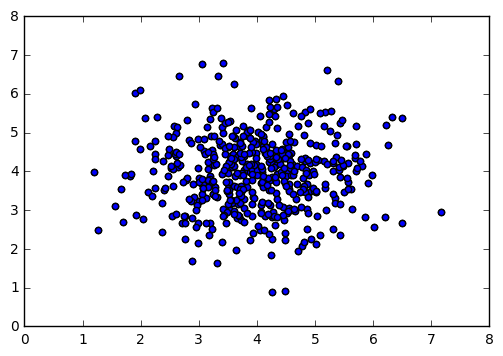

In [72]:
plt.scatter(dist[:,1],dist[:,2])

# We can use above tactics from sklearn

In [7]:
from sklearn.datasets import make_blobs

In [84]:
X,y=make_blobs(n_samples=1000,centers=3,random_state=42)

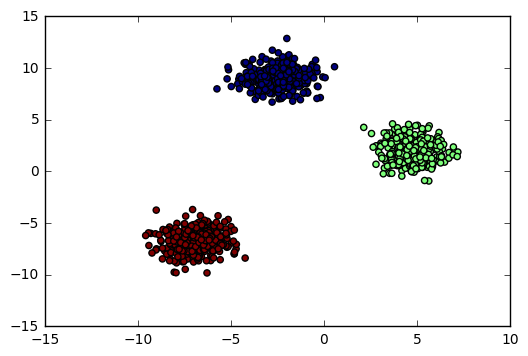

In [85]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [ ]:
class KNN:
    def __init__(self,k=10): # Initially here when values will not be given 
        self.X=None
        self.y=None
        self.k=k
    def fit(self,X,y):   # Here it will fit the X & y coordinates
        self.X=X
        self.y=y
    def predict(self,point):
        distances=[]
        for x_item, y_item in zip(self.X,self.y):
            dis=KNN.distance(point,x_item)
            distances.append((dis,y_item))
        
        distances=sorted(distances)
        top=np.array(distances[:self.k])
        
        vals,count=np.unique(top[:,1],return_counts=True)
        
        return vals[np.argmax(count)]  #Here argmax returns the index position of the unique value from the array
    
    @classmethod
    def distance(cls,p1,p2):  # Here it will count the distance
        return np.sum((p1-p2)**2)
        

In [52]:
class KNN:
    
    def __init__(self, k=10):
        self.X = None
        self.y = None
        self.k = k
        
    def fit(self, X, y):
        self.X = X
        self.y = y
        
    def predict(self, points):
        
        res = []  #result
        
        for point in points:
            res.append(self.predict_point(point))
            
        return np.array(res, dtype=int)
    
    def predict_point(self, point):
        distances = []
        
        for x_item, y_item in zip(self.X, self.y):
            dis = KNN.distance(point, x_item)
            distances.append((dis, y_item))
        
        distances = sorted(distances)
        top = np.array(distances[:self.k])
        
        vals, counts = np.unique(top[:, 1], return_counts=True)
        
        return vals[np.argmax(counts)]
    
    def accuracy(self, X, y):
        return sum(self.predict(X) == y) / len(y)
        
    @classmethod
    def distance(cls, p1, p2):
        return np.sum((p1 - p2) ** 2)

In [53]:
model=KNN(10)

In [54]:
model.fit(X,y)

In [55]:
model.predict(X[0])

array([1, 1])

In [56]:
y[0]

0

In [57]:
for i in range(10):
    print(model.predict(X[i]))

[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]


In [58]:
y[:10]

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0])

In [59]:
from sklearn.cross_validation import train_test_split

In [60]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [61]:
model.fit(X_train,y_train)

In [62]:
for point in X_test[:10]:
    print(model.predict(point))

[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]


In [63]:
y_test[:10]

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 1])

In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
model=KNeighborsClassifier(10)

In [66]:
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [67]:
model.score(X_test,y_test)

1.0